# Medical Insurance Cost Prediction

## Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing the dataset 

In [2]:
insurance_data = pd.read_csv('insurance.csv')

## Data Exploration

In [3]:
insurance_data.shape

(1338, 7)

In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


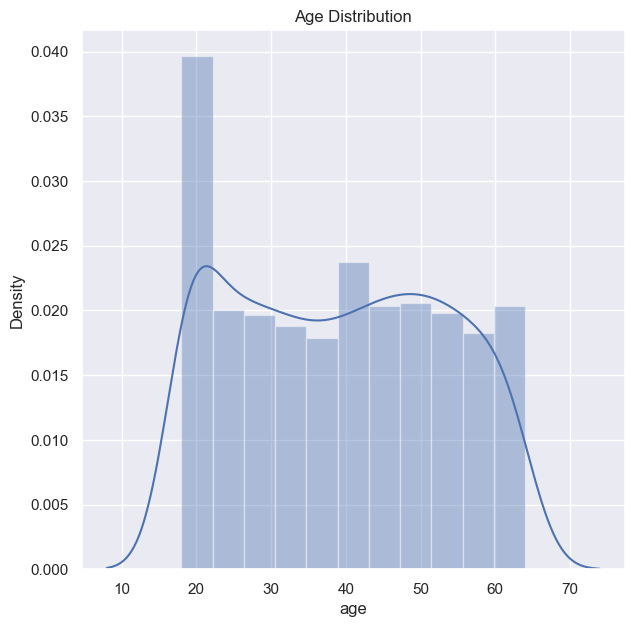

In [15]:
# distrribution of age value
sns.set()
plt.figure(figsize=(7, 7))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

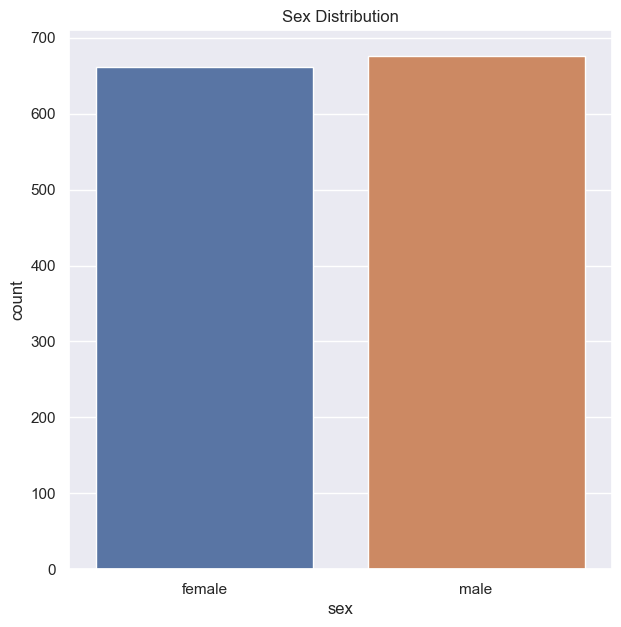

In [17]:
# sex column
plt.figure(figsize=(7, 7))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


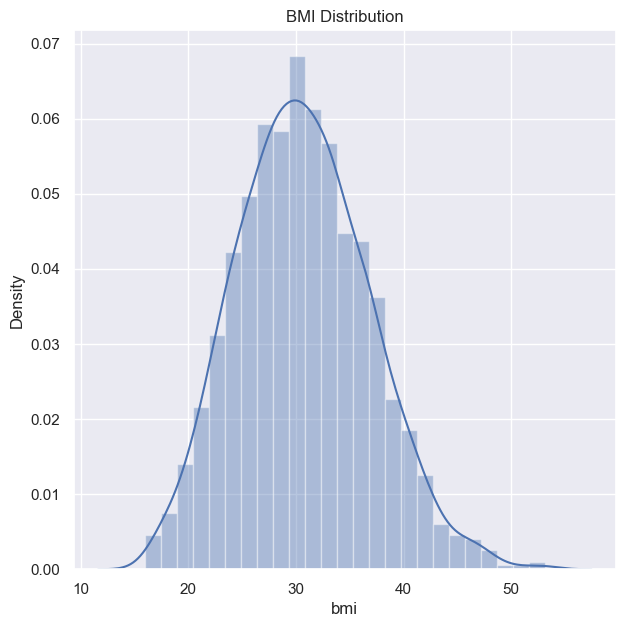

In [19]:
# bmi distribution 
plt.figure(figsize=(7, 7))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

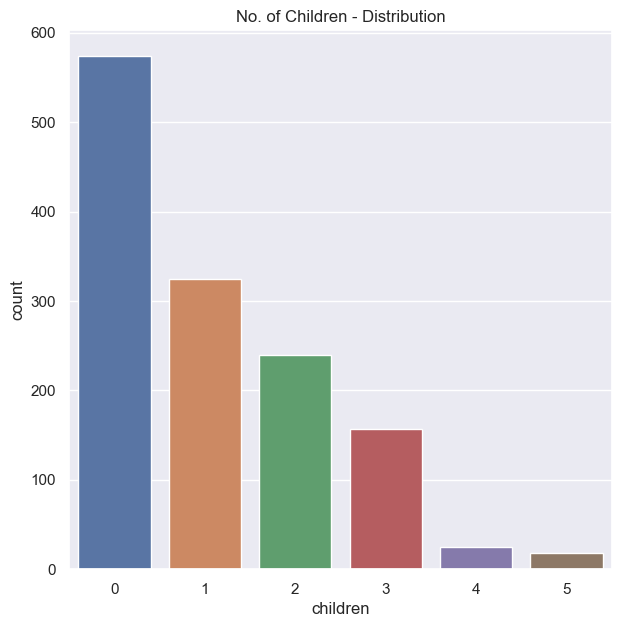

In [20]:
# children -> numerical value, but since it has a limited number of values in this dataset, we can simply use a countplot
plt.figure(figsize=(7, 7))
sns.countplot(x='children', data=insurance_data)
plt.title('No. of Children - Distribution')
plt.show()

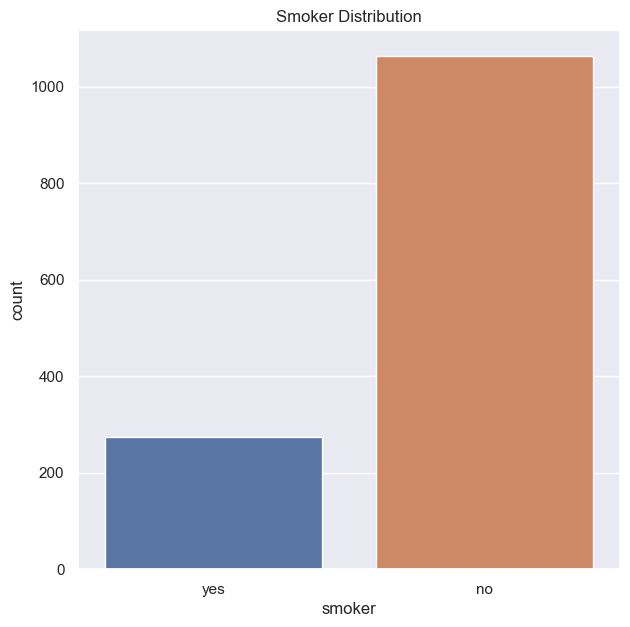

In [22]:
# smoker column
plt.figure(figsize=(7, 7))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker Distribution')
plt.show()

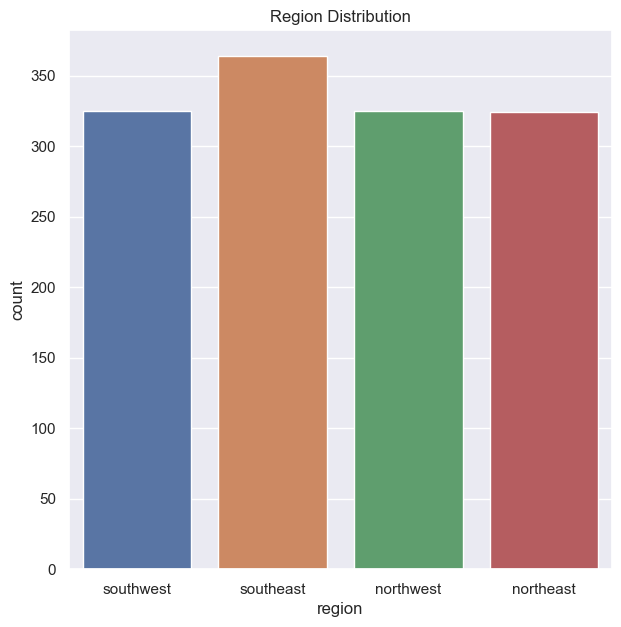

In [21]:
# region column
plt.figure(figsize=(7, 7))
sns.countplot(x='region', data=insurance_data)
plt.title('Region Distribution')
plt.show()

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


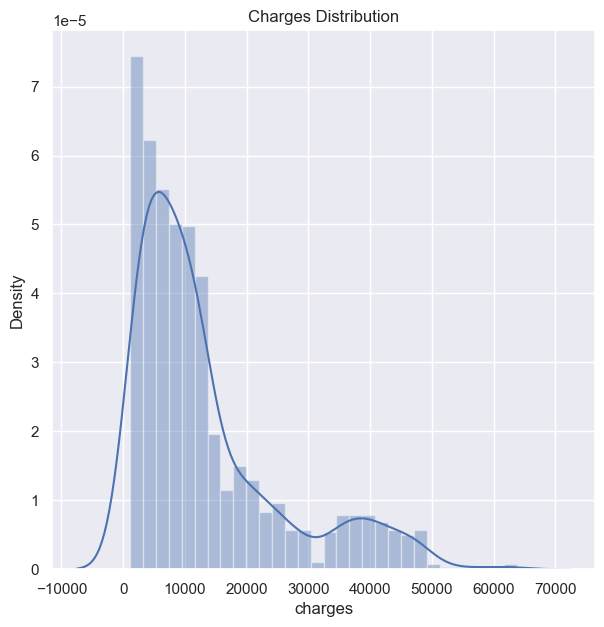

In [23]:
# charges column
plt.figure(figsize=(7, 7))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

## Data Preprocessing

In [25]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [26]:
new_dataset = insurance_data.replace({'sex': {'male': 0, 'female': 1},
                                      'smoker': {'no': 0, 'yes': 1},
                                      'region': {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}})

In [27]:
new_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


## Separating the features and the label

In [29]:
X = new_dataset.drop(columns=['charges'])
y = new_dataset['charges']

## Splitting the dataset into training set and test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Training the Linear Regression Model

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

### Evaluation on Training Set

In [32]:
y_pred_train = reg.predict(X_train)
print('R-squared error = ', r2_score(y_train, y_pred_train))

R-squared error =  0.7518195459072954


In [40]:
predictions_train = pd.DataFrame({'Actual Charges': y_train, 'Predicted Charges': y_pred_train, 'Absolute Error': (y_train - y_pred_train).abs()})
print(predictions_train)

      Actual Charges  Predicted Charges  Absolute Error
882       2585.85065         781.232895     1804.617755
505       6796.86325        9150.385482     2353.522232
798      11848.14100       13163.386009     1315.245009
792       2731.91220        1382.093436     1349.818764
201       8871.15170       10656.058570     1784.906870
...              ...                ...             ...
466      13224.69300       12776.186372      448.506628
299       9249.49520       10112.461433      862.966233
493      12574.04900       17329.287688     4755.238688
527       9861.02500        9545.842877      315.182123
1192     13019.16105       14088.602444     1069.441394

[1070 rows x 3 columns]


### Evaluation on Test Set

In [34]:
y_pred_test = reg.predict(X_test)
print('R-squared error = ', r2_score(y_test, y_pred_test))

R-squared error =  0.7454471618659976


In [39]:
predictions_test = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred_test, 'Absolute Error': (y_test - y_pred_test).abs()})
print(predictions_test)

      Actual Charges  Predicted Charges  Absolute Error
17        2395.17155        1820.756219      574.415331
1091     11286.53870       11893.355661      606.816961
273       9617.66245       10391.484266      773.821816
270       1719.43630        2131.623012      412.186712
874       8891.13950        8175.834195      715.305305
...              ...                ...             ...
232       1727.78500       -1749.690543     3477.475543
323      11566.30055       16080.989660     4514.689110
1337     29141.36030       36784.386689     7643.026389
1066      8978.18510       12898.237312     3920.052212
966      23967.38305       33974.640755    10007.257705

[268 rows x 3 columns]
